In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

Mounting google drive and making sure that our class implementation is added to the python intrepreter path

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# import sys

# # Add the current directory to Python's search path
# sys.path.append("/content/drive/MyDrive/Colab Notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("E:\Minor_Project\fake reviews dataset.csv")
# df = df.sample(frac=0.2, random_state=1234)

In [ ]:
df.tail()

,category,rating,label,text_
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...


In [ ]:
print(df['category'].unique())

['Home_and_Kitchen_5' 'Sports_and_Outdoors_5' 'Electronics_5'
 'Movies_and_TV_5' 'Tools_and_Home_Improvement_5' 'Pet_Supplies_5'
 'Kindle_Store_5' 'Books_5' 'Toys_and_Games_5'
 'Clothing_Shoes_and_Jewelry_5']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

,0
category,0
rating,0
label,0
text_,0


In [ ]:
df['rating'].value_counts()

,count
rating,
5.0,24559
4.0,7965
3.0,3786
1.0,2155
2.0,1967


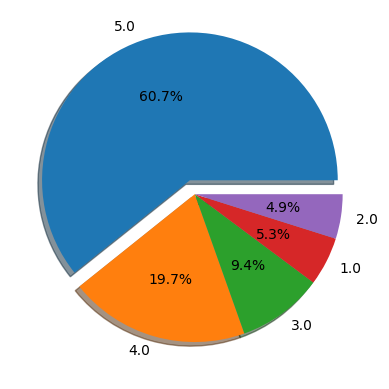

Index([5.0, 4.0, 3.0, 1.0, 2.0], dtype='float64', name='rating')
[24559  7965  3786  2155  1967]


In [ ]:
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
plt.pie(values ,labels=labels, explode=(0.1,0,0,0,0), shadow=True,autopct='%1.1f%%')
plt.show()
print(labels)
print(values)

In [ ]:
# Converting into LOWER_CASE
df['Lowercased_text'] = df['text_'].str.lower()
df.rename(columns={'text_': 'Original Text'}, inplace=True)
df.tail()

,category,rating,label,Original Text,Lowercased_text
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,i had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,i wasn't sure exactly what it would be. it is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...","you can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,i liked nothing about this dress. the only rea...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...,i work in the wedding industry and have to wor...


In [ ]:
def remove_punctuation(text):
  punctuations = string.punctuation
  return text.translate(str.maketrans('','',punctuations))
  # The first two arguments ('' and '') are empty strings, meaning there's nothing to replace and nothing to replace with.

In [ ]:
# df.drop(df.columns[3], axis=1, inplace=True)
df['Punctuation_Removed'] = df['Lowercased_text'].apply(lambda X: remove_punctuation(X))

In [ ]:
df.tail()

,category,rating,label,Original Text,Lowercased_text,Punctuation_Removed
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,i had read some reviews saying that this bra r...,i had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,i wasn't sure exactly what it would be. it is ...,i wasnt sure exactly what it would be it is a ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...","you can wear the hood by itself, wear it with ...",you can wear the hood by itself wear it with t...
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,i liked nothing about this dress. the only rea...,i liked nothing about this dress the only reas...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...,i work in the wedding industry and have to wor...,i work in the wedding industry and have to wor...


In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
# Removing Stopwords

from nltk.corpus import stopwords
", ".join(stopwords.words("english"))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in STOPWORDS])

In [ ]:
df.drop(df.columns[4], axis=1, inplace=True)
df['Stopwords_Removed'] = df['Punctuation_Removed'].apply(lambda X: remove_stopwords(X))
df.tail()

,category,rating,label,Original Text,Punctuation_Removed,Stopwords_Removed
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,i had read some reviews saying that this bra r...,read reviews saying bra ran small ordered two ...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,i wasnt sure exactly what it would be it is a ...,wasnt sure exactly would little large small si...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...",you can wear the hood by itself wear it with t...,wear hood wear hood wear jacket without hood 3...
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,i liked nothing about this dress the only reas...,liked nothing dress reason gave 4 stars ordere...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...,i work in the wedding industry and have to wor...,work wedding industry work long days feet outs...


In [ ]:
from collections import Counter
word_count = Counter()

for text in df['Stopwords_Removed']:
  for word in text.split():
    word_count[word] += 1

word_count.most_common(10)

[('great', 16419),
 ('book', 15001),
 ('good', 14195),
 ('one', 13395),
 ('love', 10805),
 ('would', 10362),
 ('well', 10278),
 ('story', 9626),
 ('like', 9425),
 ('read', 8868)]

In [ ]:
RARE_WORDS = set(word for (word,wc) in word_count.most_common()[:-10:-1])
RARE_WORDS

{'32degrees',
 'ducks',
 'dwrthis',
 'gallbladder',
 'hippora',
 'hyvent',
 'jacketit',
 'propertys',
 'timemans'}

In [ ]:
# Remove Special Character

import re
def remove_special_char(text):
  text = re.sub('[^a-zA-Z0-9]', ' ', text)
  text = re.sub('\s+',' ',text)
  return text

In [ ]:
df.drop(df.columns[4], axis=1, inplace=True)
df['Special_Character_Removed'] = df['Stopwords_Removed'].apply(lambda X:remove_special_char(X))
df.tail()

,category,rating,label,Original Text,Stopwords_Removed,Special_Character_Removed
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,read reviews saying bra ran small ordered two ...,read reviews saying bra ran small ordered two ...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,wasnt sure exactly would little large small si...,wasnt sure exactly would little large small si...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...",wear hood wear hood wear jacket without hood 3...,wear hood wear hood wear jacket without hood 3...
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,liked nothing dress reason gave 4 stars ordere...,liked nothing dress reason gave 4 stars ordere...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...,work wedding industry work long days feet outs...,work wedding industry work long days feet outs...


In [ ]:
# Stemming

# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
# def stem_words(text):
#   return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
# df.drop(df.columns[3], axis=1, inplace=True)
# df['Stemmed_text'] = df['Special_Character_Removed'].apply(lambda X: stem_words(X))
# df.tail()

In [ ]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
wordnet_map = {'N':wordnet.NOUN, 'V':wordnet.VERB, 'J':wordnet.ADJ, 'R':wordnet.ADV}

def lemmatize_words(text):
  pos_text = pos_tag(text.split())
  return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.drop(df.columns[4], axis=1, inplace=True)
nltk.download('averaged_perceptron_tagger_eng')
df['lemmatized_text'] = df['Special_Character_Removed'].apply(lambda X: lemmatize_words(X))
df.tail()

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


,category,rating,label,Original Text,Special_Character_Removed,lemmatized_text
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,read reviews saying bra ran small ordered two ...,read review say bra run small order two band c...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,wasnt sure exactly would little large small si...,wasnt sure exactly would little large small si...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...",wear hood wear hood wear jacket without hood 3...,wear hood wear hood wear jacket without hood 3...
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,liked nothing dress reason gave 4 stars ordere...,like nothing dress reason give 4 star order si...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...,work wedding industry work long days feet outs...,work wed industry work long day foot outside h...


In [ ]:
df['label'].value_counts()

,count
label,
CG,20216
OR,20216


In [ ]:
df.dropna(inplace=True)

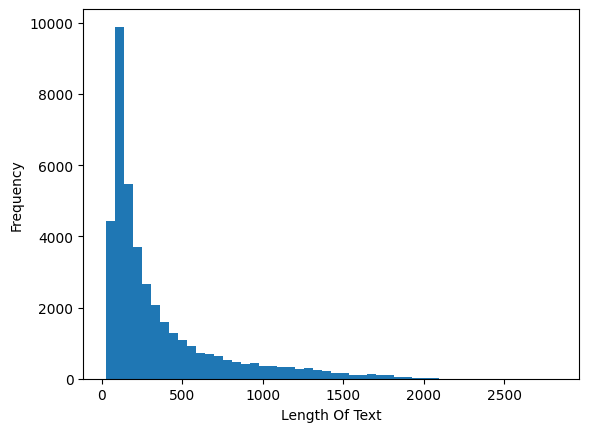

In [ ]:
plt.hist(df['Original Text'].apply(len),bins=50)
# Add labels to the axes
plt.xlabel('Length Of Text')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.show()

In [ ]:
df.groupby('label').describe()

rating                                             
         count      mean       std  min  25%  50%  75%  max
label                                                      
CG     20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0

In [ ]:
df.drop(df.columns[4], axis=1, inplace=True)
df['label'] = df['label'].apply(lambda x: 1 if x == 'OR' else 0)
df.tail()

,category,rating,label,Original Text,lemmatized_text
40427,Clothing_Shoes_and_Jewelry_5,4.0,1,I had read some reviews saying that this bra r...,read review say bra run small order two band c...
40428,Clothing_Shoes_and_Jewelry_5,5.0,0,I wasn't sure exactly what it would be. It is ...,wasnt sure exactly would little large small si...
40429,Clothing_Shoes_and_Jewelry_5,2.0,1,"You can wear the hood by itself, wear it with ...",wear hood wear hood wear jacket without hood 3...
40430,Clothing_Shoes_and_Jewelry_5,1.0,0,I liked nothing about this dress. The only rea...,like nothing dress reason give 4 star order si...
40431,Clothing_Shoes_and_Jewelry_5,5.0,1,I work in the wedding industry and have to wor...,work wed industry work long day foot outside h...


In [ ]:
X = df[['rating', 'lemmatized_text']]
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [ ]:
v = TfidfVectorizer()
X_lemmatized_tfidf = v.fit_transform(X['lemmatized_text'])

In [ ]:
# Combine 'rating' and vectorized 'lemmatized_text'
X_combined_tfidf = hstack([X['rating'].values.reshape(-1, 1), X_lemmatized_tfidf])
# Accessing the attributes of coo_matrix
# row = X_combined_tfidf.row
# col = X_combined_tfidf.col
# data = X_combined_tfidf.data
# print(row, col, data)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined_tfidf, y, test_size=0.2,random_state=1)


**Using our algorithm**

For Random Forest

In [ ]:
from RandomForest import RandomForest
# Instantiate the estimator
rf_model = RandomForest(depth=7)

# Fit the training data to model
rf_model.fit(X_train.toarray(), y_train.values)

# Make predictions on the test set
predictions = rf_model.predict(X_test.toarray())

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# saving accuracy
implementedM_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {implementedM_accuracy}")
print(classification_report(y_test, predictions))


Accuracy: 0.7492271546927167
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      4105
           1       0.77      0.71      0.74      3982

    accuracy                           0.75      8087
   macro avg       0.75      0.75      0.75      8087
weighted avg       0.75      0.75      0.75      8087



For Logistic Regression

In [ ]:
from Logistic_Regression import LogisticRegression


# Instantiate the Logistic Regression
lr_model = LogisticRegression()


# Note: Ensure that 'y_train' is in a compatible shape (1D array)
lr_model.fit(X_train.toarray(), y_train.values)

# Make predictions on the test set
predictions = lr_model.predict(X_test.toarray())

# Evaluate the Logistic Regression Model
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))

Accuracy: 0.7235068628663287
              precision    recall  f1-score   support

           0       0.87      0.54      0.66      4105
           1       0.66      0.91      0.77      3982

    accuracy                           0.72      8087
   macro avg       0.76      0.73      0.71      8087
weighted avg       0.76      0.72      0.71      8087



For Svm

In [ ]:
from SVM_C import SVM_Classifier
# Instantiate the SVM svm_model
svm_model = SVM_Classifier()

# Fit the svm_model to the training data
# Note: Ensure that 'y_train' is in a compatible shape (1D array)
svm_model.fit(X_train.toarray(), y_train.values)

# Make predictions on the test set
predictions = svm_model.predict(X_test.toarray())

# Evaluate the svm_model
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))


Accuracy: 0.8216891307035984
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      4105
           1       0.79      0.88      0.83      3982

    accuracy                           0.82      8087
   macro avg       0.83      0.82      0.82      8087
weighted avg       0.83      0.82      0.82      8087



**Using Standard Library**

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# # Instantiate the estimator
# std_model_Forest = RandomForestClassifier(criterion='entropy')

# # Fit the training data to model
# std_model_Forest.fit(X_train.toarray(), y_train.values)

# # Make predictions on the test set
# predictions = std_model_Forest.predict(X_test.toarray())

# # Evaluate the model
# from sklearn.metrics import accuracy_score, classification_report

# stdM_accuracy = accuracy_score(y_test, predictions)
# print(f"Accuracy: {stdM_accuracy}")
# print(classification_report(y_test, predictions))

**Plotting Accuracy for Standard and Implemented Model**

In [ ]:

# # Convert accuracy to percentage
# stdM_accuracy = stdM_accuracy * 100
# implementedM_accuracy = implementedM_accuracy * 100


# # Create a bar graph
# # plt.figure(figsize=(3, 5))
# plt.bar(['Implemented Model Accuracy','Standard Model Accuracy'], [implementedM_accuracy,stdM_accuracy], color='#bc93bd',width=0.5)


# # Add title and labels
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy (%)')
# plt.ylim(0, 100)  # Set limit from 0 to 100 to represent a percentage

# # Show the plot
# plt.show()


In [ ]:
# input_review = input("Enter your review text: ")
# input_rating = float(input("Enter rating: "))

# input_review = input_review.lower()
# # Remove special characters

# input_review = remove_punctuation(input_review)

# # Removing Stopwords like , me, my, myself, we,our, ours, ourselves, you, you're,etc"
# input_review = remove_stopwords(input_review)
# # Removing of Frequent Words

# # from collections import Counter
# # word_count = Counter()

# # for text in input_review:
# #   for word in text.split():
# #     word_count[word] += 1

# # word_count.most_common(10)

# # Removing of rare Word like:{'itm', 'upgrade', 'fingure', 'east', 'pistol', '410ga', 'braces', 'fired', 'eliminated'}

# input_review= remove_special_char(input_review)

# # lemmatization

# # X = [input_review, input_rating]
# # Use the same TfidfVectorizer instance used during training (v)
# X_lemmatized_tfidf = v.transform([input_review])  # Changing list into input_review is in list format
# final_text = hstack([np.array([[input_rating]]), X_lemmatized_tfidf])


# predictions1 = RandomForestClassifier(criterion='entropy')
# predictions = our_model_forest.predict(final_text.toarray())
# def decode(predictions):
#   if predictions ==[1]:
#     return 'Genuine'
#   else:
#     return 'Fake'

# print(f"According to Random Forest classifier review is: {decode(predictions1)}")
# print(f"According to Random Forest review is: {decode(predictions)}")

In [ ]:
# import joblib

# joblib.dump(tfidf_vectorizer , 'tfidf_vectorizer.pkl')

# joblib.dump(lr_model , 'lr_model.pkl')

# joblib.dump(rf_model , 'rf_model.pkl')

# joblib.dump(svm_model , 'svm_model.pkl')